Housing Price Prediction

In [1]:
#imorting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from dython.nominal import  compute_associations

In [2]:
#importing datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

In [4]:
#checking shpae and size of dataset

print(f"Shape of train set: {train_df.shape}")
print(f"Shape of test set: {test_df.shape}")

Shape of train set: (1259, 81)
Shape of test set: (201, 80)


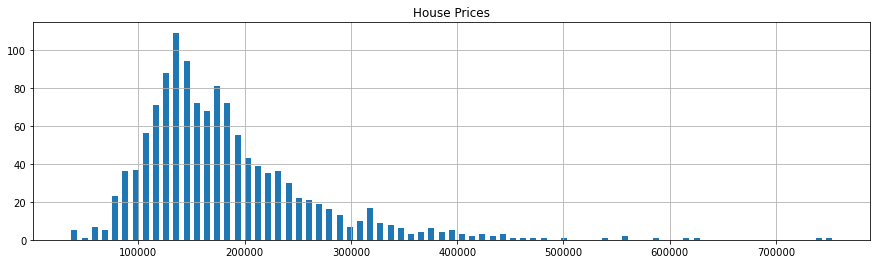

In [5]:
#plotting houses and sale price

train_df.SalePrice.hist(bins=75,rwidth = 0.6,figsize=(15,4),grid=True)
plt.title('House Prices')
plt.show()

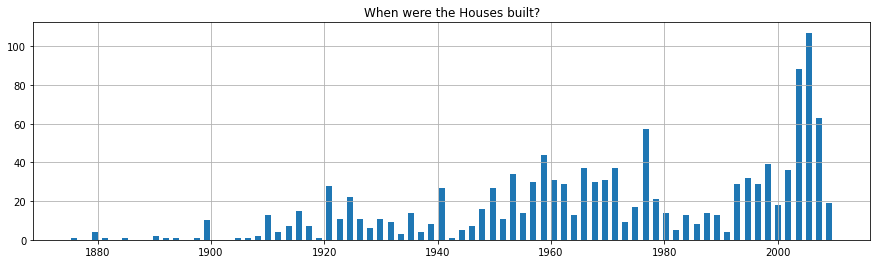

In [6]:
#plotting year built and units 

train_df.YearBuilt.hist(bins=75,rwidth=0.6,figsize=(15,4))
plt.title('When were the Houses built?')
plt.show()

<AxesSubplot:>

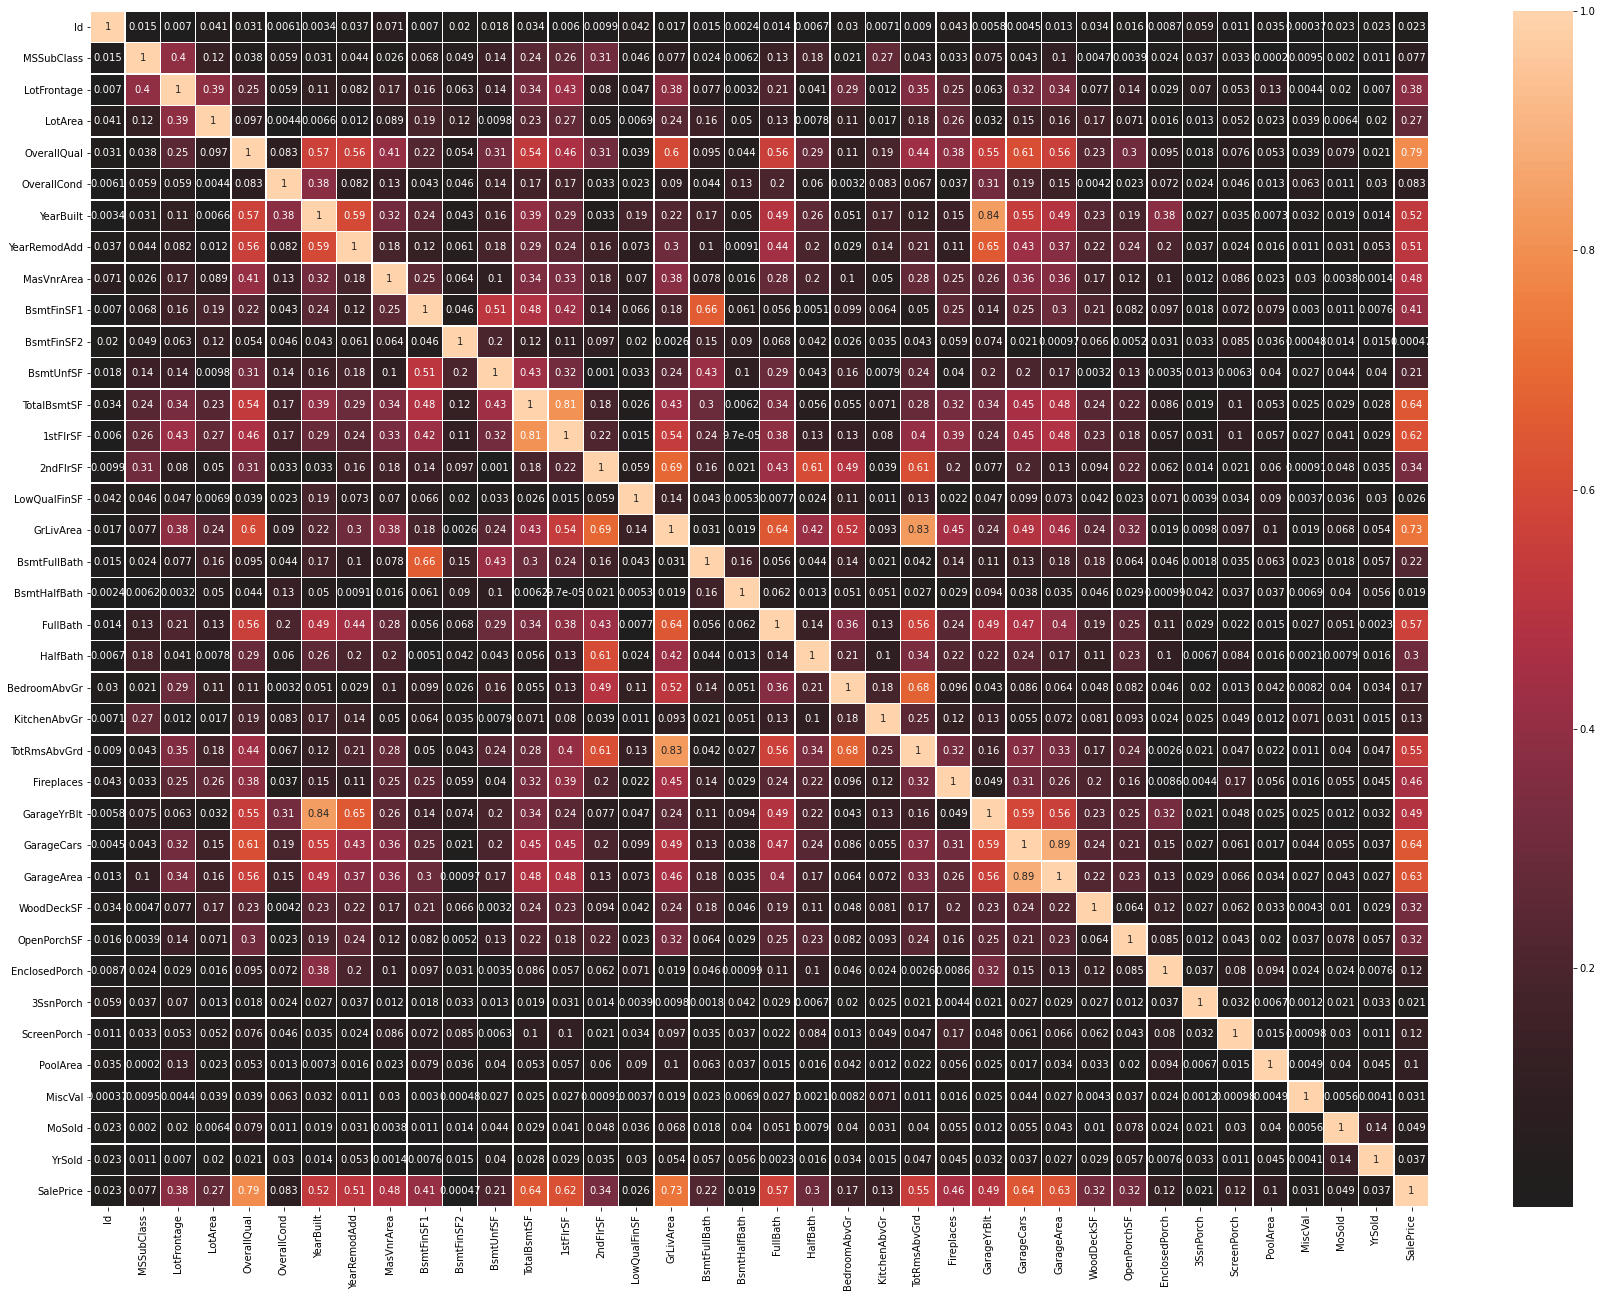

In [7]:
#plotting heatmap for correlation

plt.subplots(figsize=(30,22))
corr_matrix = train_df.corr().abs()
sns.heatmap(corr_matrix, annot=True, linewidths=.5,center=0)

In [8]:
#seprating numerical and categorical columns

numeric_cols = [cname for cname in train_df.columns if train_df[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in train_df.columns if train_df[cname].dtype == 'object' ]

               SalePrice
KitchenAbvGr   -0.133655
EnclosedPorch  -0.118917
OverallCond    -0.083382
MSSubClass     -0.076628
YrSold         -0.036798
MiscVal        -0.031333
LowQualFinSF   -0.026166
Id             -0.022742
BsmtHalfBath   -0.018857
BsmtFinSF2      0.000474
3SsnPorch       0.020845
MoSold          0.049208
PoolArea        0.101972
ScreenPorch     0.123616
BedroomAbvGr    0.170714
BsmtUnfSF       0.207560
BsmtFullBath    0.223671
LotFrontage     0.238979
GarageYrBlt     0.257454
LotArea         0.267146
HalfBath        0.298473
OpenPorchSF     0.315975
WoodDeckSF      0.316402
2ndFlrSF        0.335212
BsmtFinSF1      0.409673
Fireplaces      0.460081
MasVnrArea      0.478688
YearRemodAdd    0.512674
YearBuilt       0.524407
TotRmsAbvGrd    0.552707
FullBath        0.566303
1stFlrSF        0.617868
GarageArea      0.625499
TotalBsmtSF     0.641946
GarageCars      0.642079
GrLivArea       0.733480
OverallQual     0.790786
SalePrice       1.000000


Text(0.5, 1.0, ' Corelations between SalePrice and numerical features.')

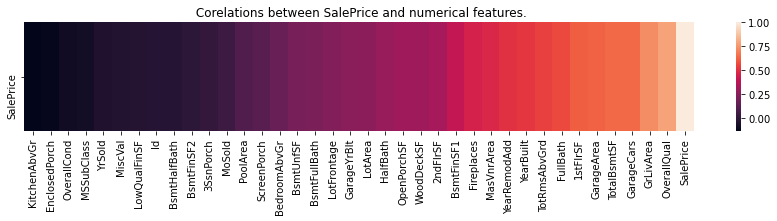

In [9]:
#plotting correrlation b/w numerical attributes and sale price

plt.subplots(figsize=(15,2))
numerical_corr_table = compute_associations(train_df[numeric_cols])
print(numerical_corr_table[['SalePrice']].sort_values(by=['SalePrice']))
sns.heatmap(numerical_corr_table[['SalePrice']].sort_values(by=['SalePrice']).T)
plt.title(f" Corelations between {'SalePrice'} and numerical features.")
#numerical_corr_table


In [10]:
categorical_cols.append('SalePrice')

               SalePrice
Utilities       0.015275
Street          0.043771
LandSlope       0.052971
MiscFeature     0.095527
Condition2      0.105728
Heating         0.106352
Functional      0.130090
LotConfig       0.134984
Alley           0.137369
LandContour     0.145918
PoolQC          0.152971
ExterCond       0.159486
Condition1      0.174549
BsmtFinType2    0.175711
RoofMatl        0.185250
BldgType        0.186271
Fence           0.191747
BsmtCond        0.225434
PavedDrive      0.239917
Electrical      0.244974
CentralAir      0.246015
RoofStyle       0.250442
LotShape        0.266380
GarageCond      0.279721
GarageQual      0.280689
HouseStyle      0.308893
MSZoning        0.327862
BsmtExposure    0.380317
Exterior2nd     0.385291
Exterior1st     0.385565
SaleCondition   0.392486
SaleType        0.398518
MasVnrType      0.433072
HeatingQC       0.446225
BsmtFinType1    0.459450
GarageType      0.497868
Foundation      0.506932
FireplaceQu     0.541336
GarageFinish    0.551130


Text(0.5, 1.0, ' Corelations between SalePrice and categorical features.')

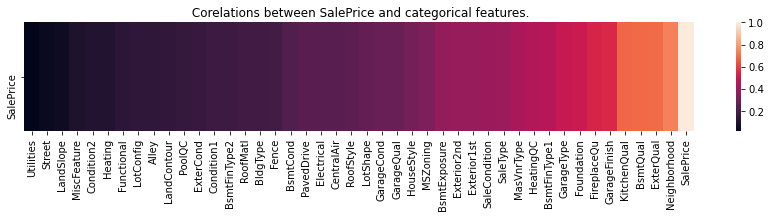

In [11]:
#plotting correrlation b/w categorical attributes and sale price

plt.subplots(figsize=(15,2))
categorical_corr_table = compute_associations(train_df[categorical_cols])
print(categorical_corr_table[['SalePrice']].sort_values(by=['SalePrice']))
sns.heatmap(categorical_corr_table[['SalePrice']].sort_values(by=['SalePrice']).T)
plt.title(f" Corelations between {'SalePrice'} and categorical features.")

In [12]:
#creating seprate table for numerical and categorical columns

num_correlated = numerical_corr_table[['SalePrice']][numerical_corr_table['SalePrice']>0.4].index.tolist()
cat_correlated = categorical_corr_table[['SalePrice']][categorical_corr_table['SalePrice']>0.4].index.tolist()

In [13]:
#training dataset with numerical columns coorelated with sale price more than 40%

x_train_num = train_df[num_correlated[:-1]]
y_train = train_df[num_correlated[-1]]
x_train_num

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea
0,7,2003,2003,196.0,706,856,856,1710,2,8,0,2,548
1,6,1976,1976,0.0,978,1262,1262,1262,2,6,1,2,460
2,7,2001,2002,162.0,486,920,920,1786,2,6,1,2,608
3,7,1915,1970,0.0,216,756,961,1717,1,7,1,3,642
4,8,2000,2000,350.0,655,1145,1145,2198,2,9,1,3,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,7,2003,2004,92.0,0,746,760,1656,2,7,1,2,397
1255,6,1931,1950,0.0,425,884,959,1367,1,6,1,1,560
1256,8,1994,1994,554.0,1314,1986,1987,1987,2,7,1,2,691
1257,5,1922,1950,0.0,0,864,864,864,1,4,0,0,0


In [14]:
#identifying null values

for column in train_df:
    if train_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, train_df[column].isnull().sum()))

LotFrontage has 218 null values
Alley has 1183 null values
MasVnrType has 7 null values
MasVnrArea has 7 null values
BsmtQual has 35 null values
BsmtCond has 35 null values
BsmtExposure has 36 null values
BsmtFinType1 has 35 null values
BsmtFinType2 has 36 null values
FireplaceQu has 599 null values
GarageType has 71 null values
GarageYrBlt has 71 null values
GarageFinish has 71 null values
GarageQual has 71 null values
GarageCond has 71 null values
PoolQC has 1255 null values
Fence has 1019 null values
MiscFeature has 1208 null values


In [15]:
#identifying null values

for column in test_df:
    if test_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, test_df[column].isnull().sum()))

LotFrontage has 41 null values
Alley has 186 null values
MasVnrType has 1 null values
MasVnrArea has 1 null values
BsmtQual has 2 null values
BsmtCond has 2 null values
BsmtExposure has 2 null values
BsmtFinType1 has 2 null values
BsmtFinType2 has 2 null values
Electrical has 1 null values
FireplaceQu has 91 null values
GarageType has 10 null values
GarageYrBlt has 10 null values
GarageFinish has 10 null values
GarageQual has 10 null values
GarageCond has 10 null values
PoolQC has 198 null values
Fence has 160 null values
MiscFeature has 198 null values


In [16]:
#Dropping Alley, PoolQC, Fence, MiscFeature as it has low correlation and high missing values

train_df.drop('Alley',
  axis='columns', inplace=True)

train_df.drop('PoolQC',
  axis='columns', inplace=True)

train_df.drop('Fence',
  axis='columns', inplace=True)

train_df.drop('MiscFeature',
  axis='columns', inplace=True)

In [17]:
#Dropping Alley, PoolQC, Fence, MiscFeature as it has low correlation and high missing values

test_df.drop('Alley',
  axis='columns', inplace=True)

test_df.drop('PoolQC',
  axis='columns', inplace=True)

test_df.drop('Fence',
  axis='columns', inplace=True)

test_df.drop('MiscFeature',
  axis='columns', inplace=True)

In [18]:
#value counts to replace null values

test_df['MSZoning'].value_counts()
test_df['Utilities'].value_counts()
test_df['Exterior1st'].value_counts()
test_df['Exterior2nd'].value_counts()
test_df['BsmtFullBath'].value_counts()
test_df['BsmtHalfBath'].value_counts()
test_df['KitchenQual'].value_counts()
test_df['Functional'].value_counts()
test_df['GarageCars'].value_counts()
test_df['SaleType'].value_counts()

WD     180
New     15
COD      5
CWD      1
Name: SaleType, dtype: int64

In [19]:
#Replacing NUll values with appropriate alternative

train_df['LotFrontage'].fillna((train_df['LotFrontage'].median()), inplace=True)
#train_df['Alley'].fillna("NA", inplace=True)
train_df['MasVnrType'].fillna("None", inplace=True)
train_df['MasVnrArea'].fillna((train_df['MasVnrArea'].median()), inplace=True)

train_df['BsmtQual'].fillna("NB", inplace=True)
train_df['BsmtCond'].fillna("NB", inplace=True)
train_df['BsmtExposure'].fillna("NB", inplace=True)
train_df['BsmtFinType1'].fillna("NB", inplace=True)
train_df['BsmtFinType2'].fillna("NB", inplace=True)

train_df['FireplaceQu'].fillna("NF", inplace=True)

train_df['GarageType'].fillna("NG", inplace=True)
train_df['GarageYrBlt'].fillna((train_df['MasVnrArea'].mean()), inplace=True) #to not make a big chamge in variance
train_df['GarageFinish'].fillna("NG", inplace=True)
train_df['GarageQual'].fillna("NG", inplace=True)
train_df['GarageCond'].fillna("NG", inplace=True)

#train_df['PoolQC'].fillna("NB", inplace=True)
#train_df['Fence'].fillna("NF", inplace=True)
#train_df['MiscFeature'].fillna("NM", inplace=True)

In [20]:
#Replacing NUll values with appropriate alternative

test_df['LotFrontage'].fillna((test_df['LotFrontage'].median()), inplace=True)
#test_df['Alley'].fillna("NA", inplace=True)
test_df['MasVnrType'].fillna("None", inplace=True)
test_df['MasVnrArea'].fillna((test_df['MasVnrArea'].median()), inplace=True)
test_df['MSZoning'].fillna("RL", inplace=True)
test_df['Utilities'].fillna("AllPub", inplace=True)

test_df['BsmtQual'].fillna("NB", inplace=True)
test_df['BsmtCond'].fillna("NB", inplace=True)
test_df['BsmtExposure'].fillna("NB", inplace=True)
test_df['BsmtFinType1'].fillna("NB", inplace=True)
test_df['BsmtFinType2'].fillna("NB", inplace=True)
test_df['GarageYrBlt'].fillna((test_df['MasVnrArea'].mean()), inplace=True)

test_df['BsmtFinSF1'].fillna((test_df['BsmtFinSF1'].mean()), inplace=True)
test_df['BsmtFinSF2'].fillna((test_df['BsmtFinSF2'].mean()), inplace=True)
test_df['BsmtUnfSF'].fillna((test_df['BsmtUnfSF'].mean()), inplace=True)
test_df['TotalBsmtSF'].fillna((test_df['TotalBsmtSF'].mean()), inplace=True)

test_df['BsmtFullBath'].fillna(0, inplace=True)
test_df['BsmtHalfBath'].fillna(0, inplace=True)

test_df['KitchenQual'].fillna("TA", inplace=True)

test_df['Functional'].fillna("Typ", inplace=True)

test_df['GarageCars'].fillna(2, inplace=True)
test_df['GarageArea'].fillna((test_df['GarageArea'].mean()), inplace=True)

test_df['SaleType'].fillna("WD", inplace=True)

test_df['Exterior1st'].fillna("VinylSd", inplace=True)
test_df['Exterior2nd'].fillna("VinylSd", inplace=True)

test_df['FireplaceQu'].fillna("NF", inplace=True)

test_df['GarageType'].fillna("NG", inplace=True)
test_df['GarageYrBlt'].fillna((test_df['GarageYrBlt'].mean()), inplace=True) #to not make a big chamge in variance
test_df['GarageFinish'].fillna("NG", inplace=True)
test_df['GarageQual'].fillna("NG", inplace=True)
test_df['GarageCond'].fillna("NG", inplace=True)

#test_df['PoolQC'].fillna("NB", inplace=True)
#test_df['Fence'].fillna("NF", inplace=True)
#test_df['MiscFeature'].fillna("NM", inplace=True)

In [21]:
#recheck null values

for column in train_df:
    if train_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, train_df[column].isnull().sum()))

In [22]:
#recheck null values

for column in test_df:
    if test_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, test_df[column].isnull().sum()))

Electrical has 1 null values


In [23]:
df1 = train_df.copy()
df1['source'] = 'train'
df2 = test_df.copy()
df2['source'] = 'test'
# TODO
data = pd.concat([df1, df2])

In [24]:
data["SalePrice"].value_counts()

140000.0    17
135000.0    16
145000.0    13
110000.0    12
155000.0    12
            ..
295000.0     1
188500.0     1
76000.0      1
319000.0     1
310000.0     1
Name: SalePrice, Length: 614, dtype: int64

In [25]:
test_df.select_dtypes(include=['object']).columns.tolist()

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [26]:
g = data.columns.to_series().groupby(data.dtypes).groups
data_dum = pd.get_dummies(data, columns=['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition'])
print(data_dum)

       Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0       1          60         65.0     8450            7            5   
1       2          20         80.0     9600            6            8   
2       3          60         68.0    11250            7            5   
3       4          70         60.0     9550            7            5   
4       5          60         84.0    14260            8            5   
..    ...         ...          ...      ...          ...          ...   
196  1456          60         62.0     7917            6            5   
197  1457          20         85.0    13175            6            6   
198  1458          70         66.0     9042            7            9   
199  1459          20         68.0     9717            5            6   
200  1460          20         75.0     9937            5            6   

     YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0         2003          2003       196.0      

In [27]:
train = data_dum[data_dum["source"] == "train"]
test = data_dum[data_dum["source"] == "test"]

In [28]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [29]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1260,20,65.0,9750,6,8,1969,1969,0.0,602,...,0,0,0,1,0,0,0,0,1,0
1,1261,60,65.5,24682,6,5,1999,1999,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,1262,20,80.0,9600,5,6,1956,1956,0.0,504,...,0,0,0,1,0,0,0,0,1,0
3,1263,50,65.5,11250,4,5,1957,1989,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,1264,70,60.0,13515,6,6,1919,1950,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [30]:
train.drop(columns=["source"], axis=1, inplace=True)
test.drop(columns=["source"], axis=1, inplace=True)

C:\Applications\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
test.drop(columns=["SalePrice"], axis=1, inplace=True)

In [32]:
print(f"Shape of train set: {train.shape}")
print(f"Shape of test set: {test.shape}")

Shape of train set: (1259, 287)
Shape of test set: (201, 286)


In [33]:
df_quant = train_df[numeric_cols]
#df_quant.hist(bins=50, figsize = (20,15))
#plt.show()